<a id='top'></a>

# Webscraping of TransferMarkt Data
##### Notebook to scrape raw data from [TransferMarkt](https://www.transfermarkt.co.uk/) using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 13/09/2020<br>
Notebook last updated: 04/12/2020

![title](../../img/transfermarkt-logo-banner.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook engineers previously scraped data from [TransferMarkt](https://www.transfermarkt.co.uk/) using the [FCrSTATS](https://twitter.com/FC_rstats) [Tyrone Ming](https://github.com/FCrSTATS/tyrone_mings) webscraper and manipulates this landed data as DataFrames using [pandas](http://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/) for visualisation.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
      3.    [String Cleaning](#section4.3)<br>
      4.    [Converting Data Types](#section4.4)<br>
      5.    [Export the Engineered DataFrame](#section4.5)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Flatten lists
from functools import reduce

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# APIs
from tyrone_mings import * 

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno

# Progress Bar
from tqdm import tqdm

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Variables

In [3]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_tm = os.path.join(base_dir, 'data', 'tm')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

### Notebook Settings

In [5]:
pd.set_option('display.max_columns', None)

### Custom Functions

In [6]:
def draw_pitch(pitch, line, orientation,view):
    
    orientation = orientation
    view = view
    line = line
    pitch = pitch
    
    if orientation.lower().startswith("h"):
        
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(49,105)
            plt.ylim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.xlim(-1,105)
            plt.ylim(-1,69)
        ax.axis('off') # this hides the x and y ticks
    
        # side and goal lines #
        ly1 = [0,0,68,68,0]
        lx1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        ly2 = [13.84,13.84,54.16,54.16] 
        lx2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        ly3 = [13.84,13.84,54.16,54.16] 
        lx3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        ly4 = [30.34,30.34,37.66,37.66]
        lx4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        ly5 = [30.34,30.34,37.66,37.66]
        lx5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        ly6 = [24.84,24.84,43.16,43.16]
        lx6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        ly7 = [24.84,24.84,43.16,43.16]
        lx7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        ly8 = [0,68] 
        lx8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        plt.scatter(93,34,color=line,zorder=5)
        plt.scatter(11,34,color=line,zorder=5)
        plt.scatter(52,34,color=line,zorder=5)

        circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)

        ## Rectangles in boxes
        rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color=pitch, zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 106,70,ls='-',color=pitch, zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        
    else:
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(49,105)
            plt.xlim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.ylim(-1,105)
            plt.xlim(-1,69)
        ax.axis('off') # this hides the x and y ticks

        # side and goal lines #
        lx1 = [0,0,68,68,0]
        ly1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        lx2 = [13.84,13.84,54.16,54.16] 
        ly2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        lx3 = [13.84,13.84,54.16,54.16] 
        ly3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        lx4 = [30.34,30.34,37.66,37.66]
        ly4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        lx5 = [30.34,30.34,37.66,37.66]
        ly5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        lx6 = [24.84,24.84,43.16,43.16]
        ly6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        lx7 = [24.84,24.84,43.16,43.16]
        ly7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        lx8 = [0,68] 
        ly8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        plt.scatter(34,93,color=line,zorder=5)
        plt.scatter(34,11,color=line,zorder=5)
        plt.scatter(34,52,color=line,zorder=5)

        circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((34,52), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)


        ## Rectangles in boxes
        rec1 = plt.Rectangle((20, 87.5), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 70,106,ls='-',color=pitch, zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook scrapes football data from [TransferMarkt](https://www.transfermarkt.co.uk/), using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames and [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

The data of player values produced in this notebook is exported to CSV. This data can be further analysed in Python, joined to other datasets, or explored using dashboarding tools such as Tableau or PowerBI, or explores in a spreadsheet such as Microsoft Excel or Google Sheets.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>
[TransferMarkt](https://www.transfermarkt.co.uk/) is a German-based website owned by [Axel Springer](https://www.axelspringer.com/en/) and is the leading website for the football transfer market. The website posts football related data, including: scores and results, football news, transfer rumours, and most usefully for us - calculated estimates ofthe market values for teams and individual players.

To read more about how these estimations are made, [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann does an excellent job of explaining how the estimations are made and their level of accuracy.

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2'>3.2. Bio and Status Dataset</a>

#### <a id='#section3.2.1'>3.2.1. Data Dictionaries</a>
The [TransferMarkt](https://www.transfermarkt.co.uk/) dataset has six features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `position_number`    | object     |
| `position_description`    | object     |
| `name`    | object     |
| `dob`    | object     |
| `nationality`    | object     |
| `value`    | object     |

#### <a id='#section3.2.2'>3.2.2. Import CSV as pandas DataFrame</a>

##### Define year to import

In [7]:
# Define variables

## Define season
season = '2020'    # '2020' for the 20/21 season


# Create 'Full Season' and 'Short Season' strings

## Full season
full_season_string = str(int(season)) + '/' + str(int(season) + 1)

## Short season
short_season_string = str((str(int(season))[-2:]) + (str(int(season) + 1)[-2:]))

In [8]:
full_season_string

'2020/2021'

In [9]:
short_season_string

'2021'

##### Import CSVs as DataFrame

In [11]:
# Export DataFrame as a CSV file

## TM Bio data
df_tm_bio_raw = pd.read_csv(data_dir_tm + f'/raw/{short_season_string}/bio/' + f'tm_player_bio_all_{short_season_string}_latest.csv')

## TM Status data
df_tm_status_raw = pd.read_csv(data_dir_tm + f'/raw/{short_season_string}/status/' + f'tm_player_status_all_{short_season_string}_latest.csv')

#### <a id='#section3.2.3'>3.2.3. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

##### Bio data

In [12]:
# Display the first 5 rows of the raw DataFrame, df_tm_bio_raw
df_tm_bio_raw.head()

,player_id,player_name,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,position,height,foot,second_citizenship,season
0,206906,dominik baumgartner,20.0,7.0,1996.0,Horn,Austria,1996-07-20,NaN,187.0,right,NaN,2020-2021
1,336382,dejan joveljic,7.0,8.0,1999.0,Bijeljina,Bosnia-Herzegovina,1999-08-07,NaN,182.0,right,Bosnia-Herzegovina,2020-2021
2,52821,mario leitgeb,30.0,6.0,1988.0,Graz,Austria,1988-06-30,NaN,183.0,right,NaN,2020-2021
3,444018,eliel peretz,18.0,11.0,1996.0,Bat Yam,Israel,1996-11-18,NaN,189.0,right,NaN,2020-2021
4,145010,marc andre schmerböck,1.0,4.0,1994.0,Feldbach,Austria,1994-04-01,NaN,180.0,left,NaN,2020-2021


In [13]:
# Display the last 5 rows of the raw DataFrame, df_tm_bio_raw
df_tm_bio_raw.tail()

,player_id,player_name,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,position,height,foot,second_citizenship,season
21960,176412,oleksiy khoblenko,4.0,4.0,1994.0,Ekaterinburg,Russia,1994-04-04,NaN,184.0,right,NaN,2020-2021
21961,294780,oleksandr pikhalyonok,7.0,5.0,1997.0,Donetsk,Ukraine,1997-05-07,NaN,174.0,left,NaN,2020-2021
21962,59076,sergiy kravchenko,24.0,4.0,1983.0,Donetsk,UdSSR,1983-04-24,NaN,182.0,right,NaN,2020-2021
21963,244271,oleksandr svatok,27.0,9.0,1994.0,"Dniprodzerzhynsk, Dnipropetrovsk Region",Ukraine,1994-09-27,NaN,186.0,right,NaN,2020-2021
21964,43404,oleksiy chychykov,30.0,9.0,1987.0,"Kremenchuk, Poltava Oblast",UdSSR,1987-09-30,NaN,180.0,both,NaN,2020-2021


In [14]:
# Print the shape of the raw DataFrame, df_tm_bio_raw
print(df_tm_bio_raw.shape)

(21965, 13)


In [15]:
# Print the column names of the raw DataFrame, df_tm_bio_raw
print(df_tm_bio_raw.columns)

Index(['player_id', 'player_name', 'day_of_birth', 'month_of_birth',
       'year_of_birth', 'pob', 'cob', 'dob', 'position', 'height', 'foot',
       'second_citizenship', 'season'],
      dtype='object')


The dataset has thirteen features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [16]:
# Data types of the features of the raw DataFrame, df_tm_bio_raw
df_tm_bio_raw.dtypes

player_id               int64
player_name            object
day_of_birth          float64
month_of_birth        float64
year_of_birth         float64
pob                    object
cob                    object
dob                    object
position              float64
height                float64
foot                   object
second_citizenship     object
season                 object
dtype: object

All thirteen of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [17]:
# Info for the raw DataFrame, df_tm_bio_raw
df_tm_bio_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21965 entries, 0 to 21964
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_id           21965 non-null  int64  
 1   player_name         21965 non-null  object 
 2   day_of_birth        21896 non-null  float64
 3   month_of_birth      21896 non-null  float64
 4   year_of_birth       21896 non-null  float64
 5   pob                 18501 non-null  object 
 6   cob                 21964 non-null  object 
 7   dob                 21896 non-null  object 
 8   position            0 non-null      float64
 9   height              20459 non-null  float64
 10  foot                18392 non-null  object 
 11  second_citizenship  4679 non-null   object 
 12  season              21965 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 2.2+ MB


In [18]:
# Description of the raw DataFrame, df_tm_bio_raw, showing some summary statistics for each numberical column in the DataFrame
df_tm_bio_raw.describe()

,player_id,day_of_birth,month_of_birth,year_of_birth,position,height
count,21965.000000,21896.000000,21896.000000,21896.000000,0.0,20459.000000
mean,319561.790667,15.404320,5.891259,1994.476754,NaN,181.423970
std,204798.552417,8.778572,3.423867,4.740260,NaN,7.013793
min,688.000000,1.000000,1.000000,1967.000000,NaN,30.000000
25%,148004.000000,8.000000,3.000000,1991.000000,NaN,176.000000
50%,289182.000000,15.000000,6.000000,1995.000000,NaN,182.000000
75%,463862.000000,23.000000,9.000000,1998.000000,NaN,186.000000
max,842420.000000,31.000000,12.000000,2005.000000,NaN,206.000000


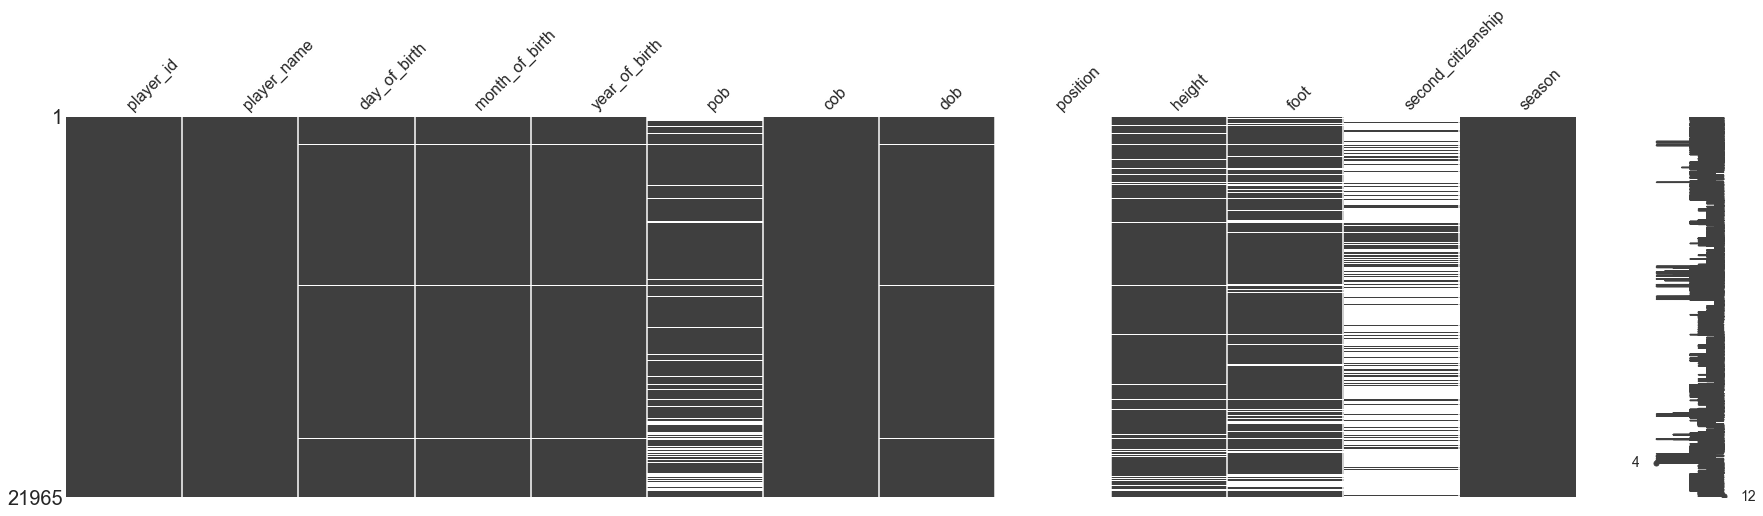

In [19]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tm_bio_raw
msno.matrix(df_tm_bio_raw, figsize = (30, 7))

In [20]:
# Counts of missing values
tm_bio_null_value_stats = df_tm_bio_raw.isnull().sum(axis=0)
tm_bio_null_value_stats[tm_bio_null_value_stats != 0]

day_of_birth             69
month_of_birth           69
year_of_birth            69
pob                    3464
cob                       1
dob                      69
position              21965
height                 1506
foot                   3573
second_citizenship    17286
dtype: int64

The visualisation shows us very quickly that there a few missing values in most of the columns, but the dataset is ready for us.

##### Status data

In [21]:
# Display the first 5 rows of the raw DataFrame, df_tm_status_raw
df_tm_status_raw.head()

,player_id,current_club,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season
0,226968,southampton fc,england,800000,2016-07-01,2021-06-30,NaN,NaN,NaN,NaN,New Vision,2020/2021
1,99331,southampton fc,england,15000000,2018-07-13,2022-06-30,NaN,NaN,NaN,NaN,ISMG International,2020/2021
2,341051,southampton fc,england,15000000,2020-08-11,2025-06-30,NaN,NaN,NaN,NaN,YMU Group,2020/2021
3,40611,southampton fc,england,10500000,2015-02-02,2021-06-30,NaN,NaN,NaN,NaN,First Access Sports,2020/2021
4,346779,southampton fc,england,15000000,2019-07-01,2024-06-30,NaN,NaN,NaN,NaN,Unique Sports Management,2020/2021


In [22]:
# Display the last 5 rows of the raw DataFrame, df_tm_status_raw
df_tm_status_raw.tail()

,player_id,current_club,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season
545,40204,tottenham hotspur,england,2400000,2020-08-18,2022-06-30,NaN,NaN,NaN,NaN,NaN,2020/2021
546,42710,tottenham hotspur,england,20000000,2015-07-08,2023-06-30,NaN,NaN,NaN,NaN,Stirr Associates,2020/2021
547,39381,tottenham hotspur,england,20000000,2020-09-19,2022-06-30,NaN,real madrid,spain,2021-06-30,Stellar Football Ltd,2020/2021
548,450936,tottenham hotspur,england,45000000,2019-07-02,2025-06-30,NaN,NaN,NaN,NaN,NaN,2020/2021
549,207929,tottenham hotspur,england,38000000,2015-02-02,2024-06-30,NaN,NaN,NaN,NaN,CAA Base Ltd,2020/2021


In [23]:
# Print the shape of the raw DataFrame, df_tm_status_raw
print(df_tm_status_raw.shape)

(550, 12)


In [24]:
# Print the column names of the raw DataFrame, df_tm_status_raw
print(df_tm_status_raw.columns)

Index(['player_id', 'current_club', 'current_club_country', 'market_value',
       'joined', 'contract_expires', 'contract_option', 'on_loan_from',
       'on_loan_from_country', 'loan_contract_expiry', 'player_agent',
       'season'],
      dtype='object')


The dataset has thirteen features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [25]:
# Data types of the features of the raw DataFrame, df_tm_status_raw
df_tm_status_raw.dtypes

player_id                int64
current_club            object
current_club_country    object
market_value             int64
joined                  object
contract_expires        object
contract_option         object
on_loan_from            object
on_loan_from_country    object
loan_contract_expiry    object
player_agent            object
season                  object
dtype: object

All thirteen of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [26]:
# Info for the raw DataFrame, df_tm_status_raw
df_tm_status_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   player_id             550 non-null    int64 
 1   current_club          550 non-null    object
 2   current_club_country  550 non-null    object
 3   market_value          550 non-null    int64 
 4   joined                550 non-null    object
 5   contract_expires      546 non-null    object
 6   contract_option       76 non-null     object
 7   on_loan_from          25 non-null     object
 8   on_loan_from_country  25 non-null     object
 9   loan_contract_expiry  25 non-null     object
 10  player_agent          466 non-null    object
 11  season                550 non-null    object
dtypes: int64(2), object(10)
memory usage: 51.7+ KB


In [27]:
# Description of the raw DataFrame, df_tm_status_raw, showing some summary statistics for each numberical column in the DataFrame
df_tm_status_raw.describe()

,player_id,market_value
count,550.000000,5.500000e+02
mean,218883.634545,1.617559e+07
std,153184.026648,1.963913e+07
min,2857.000000,0.000000e+00
25%,89539.750000,3.500000e+06
50%,184124.000000,9.000000e+06
75%,331247.750000,2.187500e+07
max,788283.000000,1.200000e+08


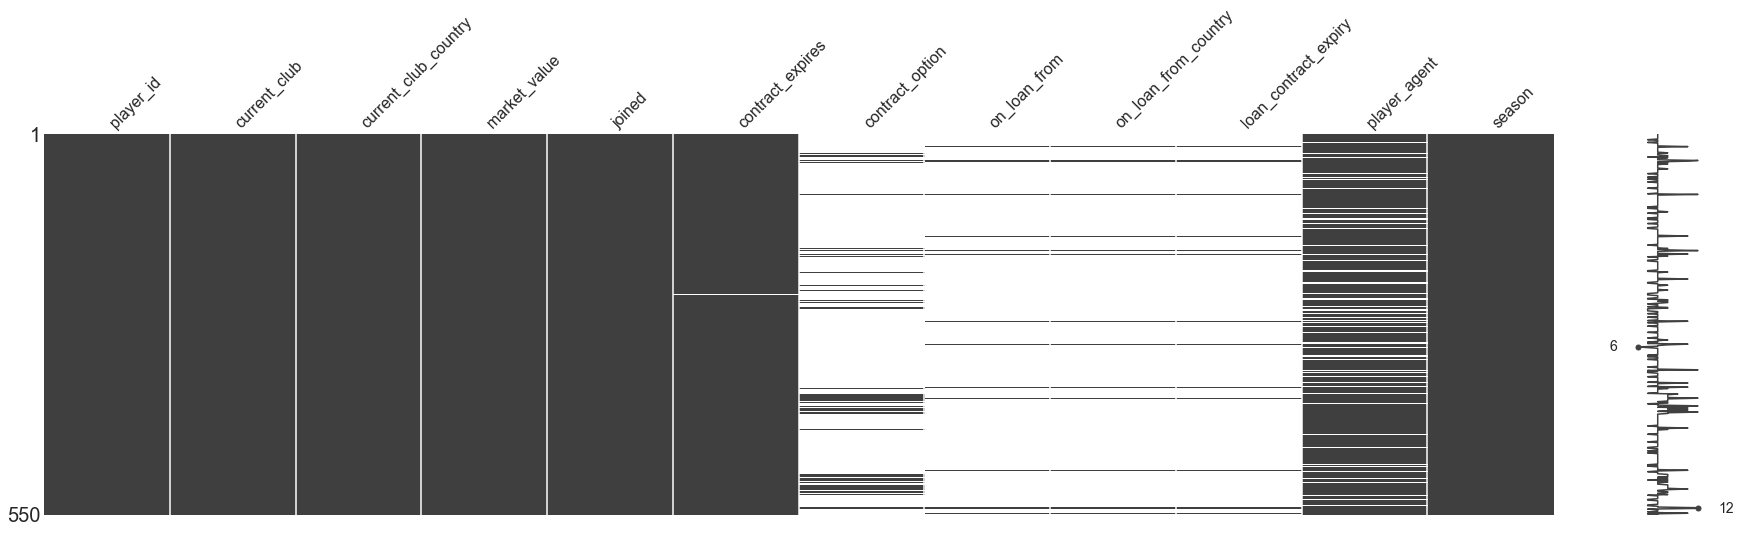

In [28]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tm_status_raw
msno.matrix(df_tm_status_raw, figsize = (30, 7))

In [29]:
# Counts of missing values
tm_status_null_value_stats = df_tm_status_raw.isnull().sum(axis=0)
tm_status_null_value_stats[tm_status_null_value_stats != 0]

contract_expires          4
contract_option         474
on_loan_from            525
on_loan_from_country    525
loan_contract_expiry    525
player_agent             84
dtype: int64

The visualisation shows us very quickly that there a few missing values in most of the columns, but the dataset is ready for us.

### <a id='#section3.3'>3.3. Transfer History Dataset</a>

In [ ]:
# WRITE CODE HERE

## <a id='#section4'>4. Data Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.1'>4.1. Bio and Status Datasets</a>

#### <a id='#section4.1.1'>4.1.1. Join Bio and Status Datasets</a>

In [32]:
# Join the Bio and Status DataFrames to form one, unified DataFrame
df_tm_bio_status = pd.merge(df_tm_bio_raw, df_tm_status_raw, left_on='player_id', right_on='player_id', how='left')

In [33]:
df_tm_bio_status.head()

,player_id,player_name,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,position,height,foot,second_citizenship,season_x,current_club,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season_y
0,206906,dominik baumgartner,20.0,7.0,1996.0,Horn,Austria,1996-07-20,NaN,187.0,right,NaN,2020-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,336382,dejan joveljic,7.0,8.0,1999.0,Bijeljina,Bosnia-Herzegovina,1999-08-07,NaN,182.0,right,Bosnia-Herzegovina,2020-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52821,mario leitgeb,30.0,6.0,1988.0,Graz,Austria,1988-06-30,NaN,183.0,right,NaN,2020-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,444018,eliel peretz,18.0,11.0,1996.0,Bat Yam,Israel,1996-11-18,NaN,189.0,right,NaN,2020-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,145010,marc andre schmerböck,1.0,4.0,1994.0,Feldbach,Austria,1994-04-01,NaN,180.0,left,NaN,2020-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_tm_bio_status_notnullvalue = df_tm_bio_status[~df_tm_bio_status['market_value'].isnull()]

In [37]:
df_tm_bio_status_notnullvalue.shape

(549, 24)

In [38]:
df_tm_bio_status_notnullvalue.head()

,player_id,player_name,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,position,height,foot,second_citizenship,season_x,current_club,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season_y
496,534033,alexis mac allister,24.0,12.0,1998.0,Santa Rosa,Argentina,1998-12-24,NaN,174.0,right,NaN,2020-2021,brighton & hove albion,england,11000000.0,2019-01-24,2023-06-30,NaN,NaN,NaN,NaN,NaN,2020/2021
1330,93176,marcos rojo,20.0,3.0,1990.0,Buenos Aires,Argentina,1990-03-20,NaN,187.0,left,NaN,2020-2021,manchester united,england,6000000.0,2014-08-20,2021-06-30,NaN,NaN,NaN,NaN,Stellar Football Ltd,2020/2021
7370,134425,raheem sterling,8.0,12.0,1994.0,Kingston,Jamaica,1994-12-08,NaN,170.0,right,Jamaica,2020-2021,manchester city,england,110000000.0,2015-07-14,2023-06-30,NaN,NaN,NaN,NaN,Colossal Sports Management,2020/2021
7371,238223,ederson,17.0,8.0,1993.0,Osasco (SP),Brazil,1993-08-17,NaN,188.0,left,Portugal,2020-2021,manchester city,england,56000000.0,2017-07-01,2025-06-30,NaN,NaN,NaN,NaN,Gestifute,2020/2021
7372,88755,kevin de bruyne,28.0,6.0,1991.0,Drongen,Belgium,1991-06-28,NaN,181.0,right,NaN,2020-2021,manchester city,england,120000000.0,2015-08-30,2023-06-30,NaN,NaN,NaN,NaN,NaN,2020/2021


### <a id='#section4.1'>4.1. Assign Raw DataFrames to New Engineered DataFrames</a>

In [33]:
# Export scraped DataFrame as a CSV
df_tm_bio_status = pd.read_csv(data_dir_tm + '/raw/1819/combined/' + 'tm_player_efl_joined_all_1819_last_updated_19092020.csv')

In [34]:
# Export scraped DataFrame as a CSV
df_tm_player_efl_1920_raw = pd.read_csv(data_dir_tm + '/raw/1920/combined/' + 'tm_player_efl_joined_all_1920_last_updated_19092020.csv')

In [35]:
# Assign Raw DataFrame to new Engineered DataFrame
df_tm_player_efl_1819 = df_tm_bio_status

In [36]:
# Assign Raw DataFrame to new Engineered DataFrame
df_tm_player_efl_1920 = df_tm_player_efl_1920_raw

### <a id='#section4.2'>4.2. Concatenate DataFrames</a>

In [37]:
df_tm_player_efl_1819_1920 = pd.concat([df_tm_player_efl_1819, df_tm_player_efl_1920], axis=0)

In [38]:
df_tm_player_efl_1819_1920

,player_id,player_name,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,position,height,...,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season_y
0,173900,hélder costa,12.0,1.0,1994.0,Luanda,Angola,12/01/1994,NaN,179.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,392763,ian poveda,9.0,2.0,2000.0,London,England,09/02/2000,NaN,167.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,332337,will huffer,30.0,10.0,1998.0,London,England,30/10/1998,NaN,184.0,...,NaN,100000.0,01/07/2020,NaN,NaN,NaN,NaN,NaN,Stellar Football Ltd,2018-2019
3,335721,ben white,8.0,10.0,1997.0,Poole,England,08/10/1997,NaN,185.0,...,england,5500000.0,01/07/2018,30/06/2024,NaN,NaN,NaN,NaN,NaN,2018-2019
4,596446,leif davis,12.0,1.0,2000.0,Newcastle,England,12/01/2000,NaN,177.0,...,england,100000.0,04/07/2018,30/06/2023,NaN,NaN,NaN,NaN,NaN,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,131980,conor thomas,29.0,10.0,1993.0,Coventry,England,1993-10-29,NaN,185.0,...,england,150000.0,2018-07-01,2021-06-30,NaN,NaN,NaN,NaN,TRP Sports,2019-2020
3229,91289,chris clements,6.0,2.0,1990.0,Birmingham,England,1990-02-06,NaN,175.0,...,england,150000.0,2018-08-27,2021-06-30,NaN,NaN,NaN,NaN,NaN,2019-2020
3230,471910,alex addai,20.0,12.0,1993.0,London,England,1993-12-20,NaN,178.0,...,england,0.0,2018-07-01,2021-06-30,NaN,NaN,NaN,NaN,NaN,2019-2020
3231,698011,tom chamberlain,1.0,6.0,2002.0,Cheltenham,England,2002-06-01,NaN,187.0,...,england,0.0,2020-07-01,2021-06-30,NaN,NaN,NaN,NaN,NaN,2019-2020


### <a id='#section4.3'>4.3. String Cleaning</a>

##### Name

In [39]:
df_tm_player_efl_1819_1920['name_lower'] = df_tm_player_efl_1819_1920['player_name'].str.normalize('NFKD')\
                                                                                    .str.encode('ascii', errors='ignore')\
                                                                                    .str.decode('utf-8')\
                                                                                    .str.lower()

In [40]:
# First Name Lower
df_tm_player_efl_1819_1920['firstname_lower'] = df_tm_player_efl_1819_1920['name_lower'].str.rsplit(' ', 0).str[0]

# Last Name Lower
df_tm_player_efl_1819_1920['lastname_lower'] = df_tm_player_efl_1819_1920['name_lower'].str.rsplit(' ', 1).str[-1]

# First Initial Lower
df_tm_player_efl_1819_1920['firstinitial_lower'] = df_tm_player_efl_1819_1920['name_lower'].astype(str).str[0]

### <a id='#section4.5'>4.5. Converting Data Types</a>

##### DoB
First we need to convert the `dob` column from the `object` data type to `datetime64[ns]`, again using the [.to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method.

In [41]:
# Convert birth_date from string to datetime64[ns]
df_tm_player_efl_1819_1920['dob'] = pd.to_datetime(df_tm_player_efl_1819_1920['dob'])

##### Value
The `value` column needs to be converted from a string to an integer using to [to_numeric()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html) method.

In [42]:
# Convert string to integer
df_tm_player_efl_1819_1920['market_value'] = pd.to_numeric(df_tm_player_efl_1819_1920['market_value'])

### <a id='#section4.7'>4.7. Columns of Interest</a>
We are interested in the following thirteen columns in the [TransferMarkt](https://www.transfermarkt.co.uk/) dataset:
*    `name`
*    `name_lower`
*    `firstinitial_lower`
*    `firstname_lower`
*    `lastname_lower`
*    `position_description`
*    `position_description_cleaned`
*    `value`
*    `birth_date`
*    `birth_year`
*    `birth_month`
*    `age`
*    `playing_country`

In [43]:
# Select columns of interest
df_tm_player_efl_1819_1920 = df_tm_player_efl_1819_1920[['name_lower', 'firstname_lower', 'lastname_lower', 'firstinitial_lower', 'day_of_birth', 'month_of_birth', 'year_of_birth', 'pob', 'cob', 'dob', 'height', 'foot', 'second_citizenship', 'season_x', 'current_club', 'current_club_country', 'market_value', 'joined', 'contract_expires', 'contract_option', 'on_loan_from', 'on_loan_from_country', 'loan_contract_expiry', 'player_agent']]

### <a id='#section4.8'>4.8. Convert Euros to Pounds</a>

In [44]:
rate = 0.92

In [45]:
df_tm_player_efl_1819_1920['market_value_pounds'] = df_tm_player_efl_1819_1920['market_value'] * 0.92

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### <a id='#section4.9'>4.9. Rename Columns</a>

In [46]:
df_tm_player_efl_1819_1920 = df_tm_player_efl_1819_1920.rename(columns={'season_x': 'season',
                                                                        'market_value': 'market_value_euros'
                                                                       })

In [47]:
df_tm_player_efl_1819_1920

,name_lower,firstname_lower,lastname_lower,firstinitial_lower,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,...,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,market_value_pounds
0,helder costa,helder,costa,h,12.0,1.0,1994.0,Luanda,Angola,1994-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ian poveda,ian,poveda,i,9.0,2.0,2000.0,London,England,2000-09-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,will huffer,will,huffer,w,30.0,10.0,1998.0,London,England,1998-10-30,...,NaN,100000.0,01/07/2020,NaN,NaN,NaN,NaN,NaN,Stellar Football Ltd,92000.0
3,ben white,ben,white,b,8.0,10.0,1997.0,Poole,England,1997-08-10,...,england,5500000.0,01/07/2018,30/06/2024,NaN,NaN,NaN,NaN,NaN,5060000.0
4,leif davis,leif,davis,l,12.0,1.0,2000.0,Newcastle,England,2000-12-01,...,england,100000.0,04/07/2018,30/06/2023,NaN,NaN,NaN,NaN,NaN,92000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,conor thomas,conor,thomas,c,29.0,10.0,1993.0,Coventry,England,1993-10-29,...,england,150000.0,2018-07-01,2021-06-30,NaN,NaN,NaN,NaN,TRP Sports,138000.0
3229,chris clements,chris,clements,c,6.0,2.0,1990.0,Birmingham,England,1990-02-06,...,england,150000.0,2018-08-27,2021-06-30,NaN,NaN,NaN,NaN,NaN,138000.0
3230,alex addai,alex,addai,a,20.0,12.0,1993.0,London,England,1993-12-20,...,england,0.0,2018-07-01,2021-06-30,NaN,NaN,NaN,NaN,NaN,0.0
3231,tom chamberlain,tom,chamberlain,t,1.0,6.0,2002.0,Cheltenham,England,2002-06-01,...,england,0.0,2020-07-01,2021-06-30,NaN,NaN,NaN,NaN,NaN,0.0


### <a id='#section4.10'>4.10. Split Dataset into 2018/19 and 2019/20 Season</a>

In [48]:
# Assign df_tm as a new DataFrame - df_tm_player_efl_all, to represent all the players
df_tm_player_efl_all = df_tm_player_efl_1819_1920

# Filter DataFrame for the 2018-2019 season
df_tm_player_efl_1819 = df_tm_player_efl_all[df_tm_player_efl_all['season'] == '2018-2019']

# Filter DataFrame for the 2018-2019 season
df_tm_player_efl_1920 = df_tm_player_efl_all[df_tm_player_efl_all['season'] == '2019-2020']

In [49]:
df_tm_player_efl_all.head()

,name_lower,firstname_lower,lastname_lower,firstinitial_lower,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,...,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,market_value_pounds
0,helder costa,helder,costa,h,12.0,1.0,1994.0,Luanda,Angola,1994-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ian poveda,ian,poveda,i,9.0,2.0,2000.0,London,England,2000-09-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,will huffer,will,huffer,w,30.0,10.0,1998.0,London,England,1998-10-30,...,NaN,100000.0,01/07/2020,NaN,NaN,NaN,NaN,NaN,Stellar Football Ltd,92000.0
3,ben white,ben,white,b,8.0,10.0,1997.0,Poole,England,1997-08-10,...,england,5500000.0,01/07/2018,30/06/2024,NaN,NaN,NaN,NaN,NaN,5060000.0
4,leif davis,leif,davis,l,12.0,1.0,2000.0,Newcastle,England,2000-12-01,...,england,100000.0,04/07/2018,30/06/2023,NaN,NaN,NaN,NaN,NaN,92000.0


In [50]:
df_tm_player_efl_1819.head()

,name_lower,firstname_lower,lastname_lower,firstinitial_lower,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,...,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,market_value_pounds
0,helder costa,helder,costa,h,12.0,1.0,1994.0,Luanda,Angola,1994-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ian poveda,ian,poveda,i,9.0,2.0,2000.0,London,England,2000-09-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,will huffer,will,huffer,w,30.0,10.0,1998.0,London,England,1998-10-30,...,NaN,100000.0,01/07/2020,NaN,NaN,NaN,NaN,NaN,Stellar Football Ltd,92000.0
3,ben white,ben,white,b,8.0,10.0,1997.0,Poole,England,1997-08-10,...,england,5500000.0,01/07/2018,30/06/2024,NaN,NaN,NaN,NaN,NaN,5060000.0
4,leif davis,leif,davis,l,12.0,1.0,2000.0,Newcastle,England,2000-12-01,...,england,100000.0,04/07/2018,30/06/2023,NaN,NaN,NaN,NaN,NaN,92000.0


In [51]:
# Filter DataFrame for the 2018-2019 season
df_tm_player_efl_1920.head()

,name_lower,firstname_lower,lastname_lower,firstinitial_lower,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,...,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,market_value_pounds
0,helder costa,helder,costa,h,12.0,1.0,1994.0,Luanda,Angola,1994-01-12,...,england,8000000.0,2020-07-01,2024-06-30,NaN,NaN,NaN,NaN,Gestifute,7360000.0
1,ian poveda,ian,poveda,i,9.0,2.0,2000.0,London,England,2000-02-09,...,england,675000.0,2020-01-24,2024-06-30,NaN,NaN,NaN,NaN,Elite Project Group Ltd,621000.0
2,will huffer,will,huffer,w,30.0,10.0,1998.0,London,England,1998-10-30,...,NaN,100000.0,2020-07-01,NaN,NaN,NaN,NaN,NaN,Stellar Football Ltd,92000.0
3,ben white,ben,white,b,8.0,10.0,1997.0,Poole,England,1997-10-08,...,england,5500000.0,2018-07-01,2024-06-30,NaN,NaN,NaN,NaN,NaN,5060000.0
4,leif davis,leif,davis,l,12.0,1.0,2000.0,Newcastle,England,2000-01-12,...,england,100000.0,2018-07-04,2023-06-30,NaN,NaN,NaN,NaN,NaN,92000.0


### <a id='#section4.11'>4.11. Exporting the Engineered DataFrames</a>
Export the three engineered [TransferMarkt](https://www.transfermarkt.co.uk/) DataFrames as CSV files.

In [55]:
# Datetime
import datetime
from datetime import date
import time

In [53]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

In [54]:
# Export the three DataFrames
df_tm_player_efl_all.to_csv(data_dir_tm + '/engineered/combined/' + f'tm_player_efl_all_last_updated_{today}.csv', index=None, header=True)
df_tm_player_efl_1819.to_csv(data_dir_tm + '/engineered/1819/' + f'tm_player_efl_1819_last_updated_{today}.csv', index=None, header=True)
df_tm_player_efl_1920.to_csv(data_dir_tm + '/engineered/1920/' + f'tm_player_efl_1920_last_updated_{today}.csv', index=None, header=True)

In [ ]:
# Export DataFrame as a CSV file

## Export a copy to the 'Archive' subfolder of the 21st_Club-TM folder, including the date
df_final.to_csv(data_dir_tm + '/raw/1920/status/' + f'tm_player_efl_status_all_1920_last_updated_{today}.csv', index=None, header=True)

## Export another copy to the 21st Club-Tm folder called 'latest' (can be overwritten)
df_final.to_csv(data_dir_tm + '/raw/1920/status/' + f'tm_player_efl_status_all_1920_latest.csv', index=None, header=True)

## Export a final copy to the 'Export' folder - this one is used for the Tableau visualisation
#df_final.to_csv(data_dir_tm + '/export/' + '21st_club_tm_england.csv', index=None, header=True)

Now we have created three pandas DataFrames and wrangled the data to meet our needs, we'll next conduct and [Exploratory Data Analysis ](#section5).

## <a id='#section5'>5. Exploratory Data Analysis</a>

### <a id='#section5.1'>5.1. Introduction</a>
...

### <a id='#section5.2'>5.2. ...</a>
...

## <a id='#section6'>6. Summary</a>
This notebook scrapes data for player valuations using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) from [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames and [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

## <a id='#section7'>7. Next Steps</a>
...

## <a id='#section8'>8. References</a>

### <a id='#section9.1'>8.1. Bibliography</a>

#### Data and Web Scraping
*    [tyrone_mings GitHub repository](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://github.com/FCrSTATS)
*    [Python Package Index (PyPI) tyrone-mings library](https://pypi.org/project/tyrone-mings/)
*    [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann.
*    [06/04/2020: BBC - Premier League squads 'drop £1.6bn in value'](https://www.bbc.co.uk/sport/football/52221463).

### <a id='#section9.2'>8.2. Python Techniques Observed</a>
To conduct our analysis, we have used the following libraries and modules for the following tasks:
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion, and
*    [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for scraping data from webpages.

We have also demonstrated an array of techniques in Python using the following methods and functions:
*    pandas EDA methods:
     +    [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html),
     +    [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
     +    [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
     +    [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), and
     +    [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
*    The [missingno](https://pypi.org/project/missingno/) library to visualise how many missing values we have in the dataset, and
*    The pandas [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method to export the DataFrames as csv files.

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)